In [6]:
import numpy as np
import pandas as pd

In [7]:
#Loading Dataset

data_path = 'Steel_industry_data.csv'
#Pandas Library to create Dataframe
Steel_data = pd.read_csv(data_path, engine='python')

In [8]:
#First five rows of dataset
Steel_data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [9]:
#Last five rows of dataset
Steel_data.tail()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load
35039,31/12/2018 00:00,3.67,3.02,0.07,0.0,77.22,99.98,0,Weekday,Monday,Light_Load


In [10]:
Steel_data['date'] = pd.to_datetime(Steel_data['date'], format='%d/%m/%Y %H:%M')

Steel_data['year'] = Steel_data['date'].dt.year
Steel_data['month'] = Steel_data['date'].dt.month
Steel_data['day'] = Steel_data['date'].dt.day
Steel_data['hour'] = Steel_data['date'].dt.hour
Steel_data['minute'] = Steel_data['date'].dt.minute

Steel_data = Steel_data.drop(columns=['date'])

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

Steel_data['WeekStatus'] = label_encoder.fit_transform(Steel_data['WeekStatus'])
Steel_data['Day_of_week'] = label_encoder.fit_transform(Steel_data['Day_of_week'])
Steel_data['Load_Type'] = label_encoder.fit_transform(Steel_data['Load_Type'])


In [12]:
Steel_data.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,year,month,day,hour,minute
0,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,2018,1,1,0,15
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,2018,1,1,0,30
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,2018,1,1,0,45
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,2018,1,1,1,0
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,2018,1,1,1,15


In [13]:
from sklearn.preprocessing import MinMaxScaler
continuous_columns = ['Usage_kWh', 
                      'Lagging_Current_Reactive.Power_kVarh', 
                      'Leading_Current_Reactive_Power_kVarh', 
                      'CO2(tCO2)', 
                      'Lagging_Current_Power_Factor', 
                      'Leading_Current_Power_Factor', 
                      'NSM']
scaler = MinMaxScaler()
Steel_data[continuous_columns] = scaler.fit_transform(Steel_data[continuous_columns])

In [14]:
Steel_data.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,year,month,day,hour,minute
0,0.020168,0.030441,0.0,0.0,0.7321,1.0,0.010526,0,1,0,2018,1,1,0,15
1,0.025449,0.046022,0.0,0.0,0.6677,1.0,0.021053,0,1,0,2018,1,1,0,30
2,0.020613,0.033846,0.0,0.0,0.7028,1.0,0.031579,0,1,0,2018,1,1,0,45
3,0.021059,0.036735,0.0,0.0,0.6809,1.0,0.042105,0,1,0,2018,1,1,1,0
4,0.024303,0.046435,0.0,0.0,0.6472,1.0,0.052632,0,1,0,2018,1,1,1,15


In [15]:
#Split dataset into train and test sets
train_size=int(len(Steel_data)*0.70)

train_data = Steel_data[:train_size]
test_data = Steel_data[train_size:]

In [16]:
print(f"Training data: {train_data.shape}")
print(f"Testing data: {test_data.shape}")

Training data: (24528, 15)
Testing data: (10512, 15)


In [17]:
#function to create data sequences
def create_dataset(dataset, timesteps=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-timesteps):
        dataX.append(dataset[i:i+timesteps, 1:])
        dataY.append(dataset[i+timesteps, 0])
    return np.array(dataX), np.array(dataY)

In [18]:
train_values = train_data.values
test_values = test_data.values

In [19]:
#Define number of time steps
timesteps = 95

#Create sequences
x_train, y_train = create_dataset(train_values, timesteps)
x_test, y_test = create_dataset(test_values, timesteps)
print(y_train)

[0.02175849 0.02035882 0.02449421 ... 0.32453238 0.35914238 0.35685202]


In [20]:
print(x_train.shape), print(y_train.shape)

(24433, 95, 14)
(24433,)


(None, None)

In [21]:
print(x_test.shape), print(y_test.shape)

(10417, 95, 14)
(10417,)


(None, None)

In [22]:
#Import tensorflow for stacked LSTM
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
from tensorflow.keras.optimizers import Adam

def create_stacked_LSTM(input_shape):
    model = Sequential()
    model.add(LSTM(256, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(, return_sequences=True))
    model.add(LSTM(32, return_sequences=False))
    model.add(Dense(1))
    return model

def compile_model(model, init_learning_rate):
    model_optimizer = Adam(learning_rate = init_learning_rate)
    model.compile(optimizer = 
                  model_optimizer,
                  loss='mean_squared_error', )
    return model

In [24]:
input_shape = (95, 14)
init_learning_rate = 0.0005

model = create_stacked_LSTM(input_shape)
model = compile_model(model, init_learning_rate)

model.summary()

/Users/greentea/Documents/PythonEnvs/project_env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 95, 128)        │        73,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 95, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 135,073 (527.63 KB)

 Trainable params: 135,073 (527.63 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
import tensorflow as tf

In [27]:
#Save checkpoints to file
import os
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_filepath = '/tmp/ckpt/checkpoint.model.keras'
if os.path.exists(checkpoint_filepath):
    os.remove(checkpoint_filepath)
    print("Deleted {checkpoint_filepath}")
else:
    print("No checkpoint path found at {checkpoint_filepath}")
      
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    verbose=1
)

No checkpoint path found at {checkpoint_filepath}


In [28]:
#Tensorboard callback
from tensorflow.keras.callbacks import TensorBoard
from tensorboard import notebook
import shutil

log_directory = "./logs"
if os.path.exists(log_directory):
    shutil.rmtree(log_directory)  # Remove the entire log directory and its contents
    print(f"Deleted existing TensorBoard logs at: {log_directory}")
    

tensorboard_callback = TensorBoard(
    log_dir=log_directory,
    update_freq = 'epoch'
)

Deleted existing TensorBoard logs at: ./logs


In [29]:
import os
import pickle
from tensorflow.keras.callbacks import Callback

class HistorySaver(Callback):
    def on_train_begin(self, logs=None):
        self.history = {}  # Initialize the history dictionary
        
    def on_epoch_end(self, epoch, logs=None):
        # Save metrics for each epoch
        for key, value in logs.items():
            if key not in self.history:
                self.history[key] = []
            self.history[key].append(value)
        
        # Save the history after every epoch to a file
        with open('training_history.pkl', 'wb') as f:
            pickle.dump(self.history, f)

history_saver = HistorySaver()
    

In [30]:
notebook.start("--logdir=./logs")

history = model.fit(
    x_train,y_train,
    validation_data=(x_test,y_test),
    epochs=100,
    batch_size=64,
    callbacks = [checkpoint_callback, tensorboard_callback, history_saver],
    verbose=1)

Epoch 1/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 0.0491
Epoch 1: val_loss improved from inf to 0.02700, saving model to /tmp/ckpt/checkpoint.model.keras
382/382 ━━━━━━━━━━━━━━━━━━━━ 67s 169ms/step - loss: 0.0491 - val_loss: 0.0270
Epoch 2/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 0.0370
Epoch 2: val_loss improved from 0.02700 to 0.02248, saving model to /tmp/ckpt/checkpoint.model.keras
382/382 ━━━━━━━━━━━━━━━━━━━━ 66s 172ms/step - loss: 0.0370 - val_loss: 0.0225
Epoch 3/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 0.0279
Epoch 3: val_loss improved from 0.02248 to 0.01891, saving model to /tmp/ckpt/checkpoint.model.keras
382/382 ━━━━━━━━━━━━━━━━━━━━ 66s 172ms/step - loss: 0.0279 - val_loss: 0.0189
Epoch 4/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 0.0223
Epoch 4: val_loss improved from 0.01891 to 0.01592, saving model to /tmp/ckpt/checkpoint.model.keras
382/382 ━━━━━━━━━━━━━━━━━━━━ 65s 171ms/step - loss: 0.0223 - val_loss: 0.0159
Epoch 5/

KeyboardInterrupt: 

In [32]:
with open('training_history.pkl', 'rb') as f:
    initial_history = pickle.load(f)
print(initial_history)

{'loss': [0.04341024160385132, 0.0337330661714077, 0.026654059067368507, 0.02139906957745552, 0.018304232507944107, 0.01729714870452881, 0.015652526170015335, 0.014432872645556927, 0.013477734290063381, 0.012063663452863693, 0.011280314065515995, 0.010356135666370392, 0.009647062979638577, 0.009219043888151646, 0.008853341452777386, 0.008400686085224152, 0.008678872138261795, 0.008587567135691643, 0.008110849186778069, 0.007876533083617687, 0.008125925436615944, 0.008078139275312424, 0.00795940775424242, 0.007817202247679234, 0.00798860378563404, 0.007476160302758217, 0.007688541896641254, 0.007108496502041817, 0.006977739278227091, 0.00714027788490057, 0.007070376072078943], 'val_loss': [0.027000395581126213, 0.022482339292764664, 0.01891208253800869, 0.015919940546154976, 0.01259315013885498, 0.010852708481252193, 0.010940988548099995, 0.008591554127633572, 0.007719856221228838, 0.007823885418474674, 0.008851096034049988, 0.007682581897825003, 0.007164401933550835, 0.0060035269707441

In [33]:
from tensorflow.keras.models import load_model

model = load_model(checkpoint_filepath)
completed_epochs = 31 #replace------

new_learning_rate = 0.0001
model = compile_model(model, new_learning_rate)

notebook.start("--logdir=./logs")

next_history = model.fit(
    x_train,y_train,
    validation_data=(x_test,y_test),
    epochs=100, #replace
    initial_epoch=completed_epochs,
    batch_size=64,
    callbacks = [checkpoint_callback, tensorboard_callback, history_saver],
    verbose=1)

Epoch 32/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 0.0063
Epoch 32: val_loss did not improve from 0.00469
382/382 ━━━━━━━━━━━━━━━━━━━━ 67s 167ms/step - loss: 0.0063 - val_loss: 0.0048
Epoch 33/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 0.0061
Epoch 33: val_loss did not improve from 0.00469
382/382 ━━━━━━━━━━━━━━━━━━━━ 64s 168ms/step - loss: 0.0061 - val_loss: 0.0049
Epoch 34/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.0059
Epoch 34: val_loss improved from 0.00469 to 0.00460, saving model to /tmp/ckpt/checkpoint.model.keras
382/382 ━━━━━━━━━━━━━━━━━━━━ 63s 166ms/step - loss: 0.0059 - val_loss: 0.0046
Epoch 35/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 0.0061
Epoch 35: val_loss did not improve from 0.00460
382/382 ━━━━━━━━━━━━━━━━━━━━ 64s 169ms/step - loss: 0.0061 - val_loss: 0.0052
Epoch 36/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.0059
Epoch 36: val_loss improved from 0.00460 to 0.00459, saving model to /tmp/ckpt/checkpoi

KeyboardInterrupt: 

In [34]:
with open('training_history.pkl', 'rb') as f:
    next_history = pickle.load(f)
print(next_history)

{'loss': [0.006232099607586861, 0.006055810954421759, 0.006003993563354015, 0.005976641084998846, 0.00587506964802742, 0.005889465566724539, 0.00582494679838419, 0.005843499209731817, 0.0059035224840044975, 0.0058337124064564705, 0.005856293719261885, 0.005782841704785824, 0.005776029080152512, 0.005677415989339352, 0.005787938367575407, 0.0056364103220403194], 'val_loss': [0.004848893731832504, 0.004867273382842541, 0.004601878579705954, 0.005222233012318611, 0.004588544834405184, 0.006986184511333704, 0.005218707490712404, 0.005012755282223225, 0.005012728273868561, 0.004465583246201277, 0.005989245139062405, 0.005576931871473789, 0.004645681008696556, 0.0043565817177295685, 0.004838215187191963, 0.0056347972713410854]}


In [42]:
#combined history for 48 epochs
initial_history = {'loss': [0.04341024160385132, 0.0337330661714077, 0.026654059067368507, 0.02139906957745552, 0.018304232507944107, 0.01729714870452881, 0.015652526170015335, 0.014432872645556927, 0.013477734290063381, 0.012063663452863693, 0.011280314065515995, 0.010356135666370392, 0.009647062979638577, 0.009219043888151646, 0.008853341452777386, 0.008400686085224152, 0.008678872138261795, 0.008587567135691643, 0.008110849186778069, 0.007876533083617687, 0.008125925436615944, 0.008078139275312424, 0.00795940775424242, 0.007817202247679234, 0.00798860378563404, 0.007476160302758217, 0.007688541896641254, 0.007108496502041817, 0.006977739278227091, 0.00714027788490057, 0.007070376072078943], 'val_loss': [0.027000395581126213, 0.022482339292764664, 0.01891208253800869, 0.015919940546154976, 0.01259315013885498, 0.010852708481252193, 0.010940988548099995, 0.008591554127633572, 0.007719856221228838, 0.007823885418474674, 0.008851096034049988, 0.007682581897825003, 0.007164401933550835, 0.006003526970744133, 0.006474738474935293, 0.005514880176633596, 0.011930780485272408, 0.006632156204432249, 0.00865355134010315, 0.005628417711704969, 0.007102236617356539, 0.005757712759077549, 0.005437271669507027, 0.005289597436785698, 0.0068456148728728294, 0.005496330093592405, 0.004981170874089003, 0.005240324884653091, 0.0046937596052885056, 0.008017217740416527, 0.0062105292454361916]}
for key in initial_history.keys():
    initial_history[key] += next_history[key]
history=initial_history

print(history)

{'loss': [0.04341024160385132, 0.0337330661714077, 0.026654059067368507, 0.02139906957745552, 0.018304232507944107, 0.01729714870452881, 0.015652526170015335, 0.014432872645556927, 0.013477734290063381, 0.012063663452863693, 0.011280314065515995, 0.010356135666370392, 0.009647062979638577, 0.009219043888151646, 0.008853341452777386, 0.008400686085224152, 0.008678872138261795, 0.008587567135691643, 0.008110849186778069, 0.007876533083617687, 0.008125925436615944, 0.008078139275312424, 0.00795940775424242, 0.007817202247679234, 0.00798860378563404, 0.007476160302758217, 0.007688541896641254, 0.007108496502041817, 0.006977739278227091, 0.00714027788490057, 0.007070376072078943, 0.006232099607586861, 0.006055810954421759, 0.006003993563354015, 0.005976641084998846, 0.00587506964802742, 0.005889465566724539, 0.00582494679838419, 0.005843499209731817, 0.0059035224840044975, 0.0058337124064564705, 0.005856293719261885, 0.005782841704785824, 0.005776029080152512, 0.005677415989339352, 0.005787

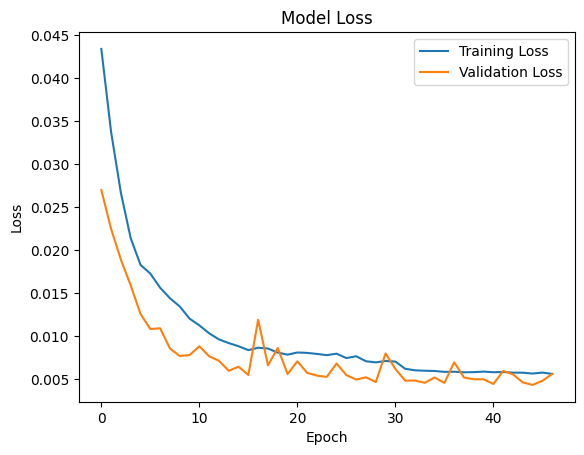

In [43]:
import matplotlib.pyplot as plt

# Plot training and validation loss values
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In [44]:
#Prediction and performance metrics
train_prediction = model.predict(x_train)
test_prediction = model.predict(x_test)

764/764 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step
326/326 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step


In [45]:
#Calculate RMSE performance metric
import math
from sklearn.metrics import mean_squared_error

train_rmse = math.sqrt(mean_squared_error(y_train, train_prediction))
test_rmse = math.sqrt(mean_squared_error(y_test, test_prediction))

print(f'Training Data RMSE: {train_rmse}')
print(f'Test Data RMSE: {test_rmse}')

Training Data RMSE: 0.07362140157456026
Test Data RMSE: 0.0692790517780434


In [46]:
#Calculate MAE performance metric
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(y_train, train_prediction)
test_mae = mean_absolute_error(y_test, test_prediction)

print(f'Training Data MAE: {train_mae}')
print(f'Test Data MAE: {test_mae}')

Training Data MAE: 0.04212127993079088
Test Data MAE: 0.039916878807539725


In [47]:
#Calculate MSE performance metric
train_mse = mean_squared_error(y_train, train_prediction)
test_mse = mean_squared_error(y_test, test_prediction)

print(f'Training Data MSE: {train_mse}')
print(f'Test Data MSE: {test_mse}')

Training Data MSE: 0.005420110769802664
Test Data MSE: 0.004799587015264818


In [48]:
#Calculate R2 performance metric
from sklearn.metrics import r2_score

train_r2_score = r2_score(y_train, train_prediction)
test_r2_score = r2_score(y_test, test_prediction)

print(f'Training Data r-squared: {train_r2_score}')
print(f'Test Data r-squared: {test_r2_score}')

Training Data r-squared: 0.8869899487135612
Test Data r-squared: 0.875918032982912


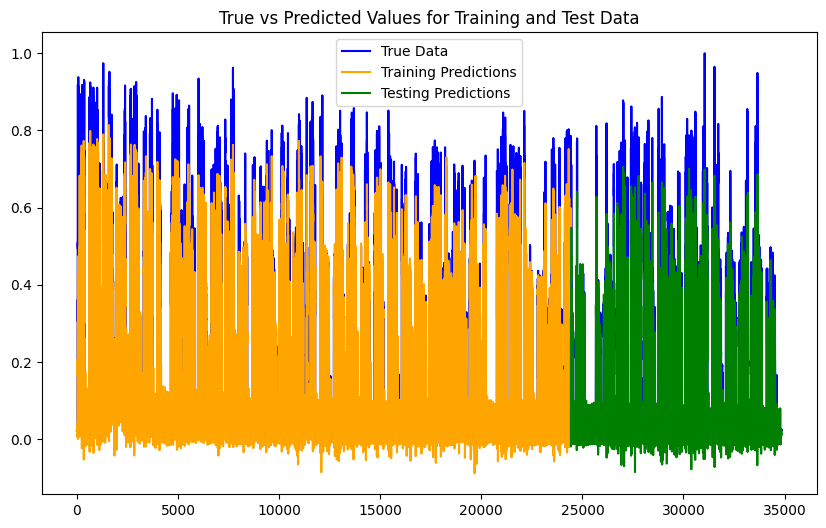

In [49]:
#Plot predictions against actual values

time_step = 95
train_prediction_plot = np.empty_like(np.concatenate([y_train, y_test]))
train_prediction_plot[:] = np.nan
train_prediction_plot[:len(train_prediction)] = train_prediction.flatten()

test_prediction_plot = np.empty_like(np.concatenate([y_train, y_test]))
test_prediction_plot[:] = np.nan
test_prediction_plot[len(train_prediction):] = test_prediction.flatten()

actual_values = np.concatenate([y_train, y_test])

plt.figure(figsize=(10,6))
plt.plot(actual_values, label = 'True Data', color='blue')
plt.plot(train_prediction_plot, label = 'Training Predictions', color='orange')
plt.plot(test_prediction_plot, label='Testing Predictions', color='green')

plt.xlabel=('Time Steps')
plt.ylabel=('Value')
plt.title('True vs Predicted Values for Training and Test Data')
plt.legend()

plt.show()


In [50]:
len(test_data)

10512

In [65]:
#Next 25 predictions using most recent test_data

output_list = []
i = 0
n_steps = 95
predictions = 100
test_input = test_data.to_numpy()
test_length = len(test_input)

start_value = test_length-n_steps-predictions
end_value = test_length-predictions

x_input = test_input[start_value:end_value, 1:]

while (i < 100):

    x_input = x_input.reshape((1, 95, 14))
    
    #store prediction in output list
    next_pred = model.predict(x_input)
    output_list = np.append(output_list, next_pred[0,0])

    #slide test_data window by 1 row
    x_input = x_input.reshape(95, 14)
    x_input = np.append(x_input[1:], test_input[start_value + i, 1:].reshape(1, -1), axis=0)

    i = i + 1

print(output_list)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

In [59]:
#Function to inverse transform array of values

def inverse_transform(array, num_features):
    dummy_array = np.zeros((len(array), num_features))
    dummy_array[:,0] = array

    original_values = scaler.inverse_transform(dummy_array)
    original_array = original_values[:,0]

    return original_array

In [66]:
#convert predictions to original values

transformed_output_list = inverse_transform(output_list, 7)
print(transformed_output_list)

[ 3.15984752  2.55320818  2.03208067  2.16378102  3.13881957  2.14097917
  1.55133603  0.91460156  0.89553626  0.92117682  1.19132925  1.45904831
  1.52731128  1.3735697   1.1286011   1.03149057  0.84977461  0.85824732
  1.22819784  2.02938528  2.46126534  2.49181887  2.25636415  2.42262533
  2.41145292  2.4106273   2.33636722  2.70042903  2.34969999  1.79142854
  1.13096962  1.156846   -1.19554558 -2.17553137  2.94879215 11.74728774
 11.99644252  7.71439664  1.34968079 -2.15412296 -0.10053346  0.08290066
  0.86320173  1.52784852  1.39870083 -0.20819339 -0.11673064  0.51777572
  0.70360598 -0.06971314 -0.26744942 -0.29405766 -0.37240946 -0.34042058
 -0.12839193  0.888291    1.08142508  1.08942079  0.94698688  0.0189586
 -0.20832262 -0.70951863 -0.7955306   0.38833578  1.19643092  1.4019399
  1.54174165  2.24049159  2.22959877  2.03674392  1.6975641   1.9164789
  1.14492614  0.19174159 -0.01589869  1.05227889  1.94448914  1.90829274
  1.62104822  1.97326233  2.13835068  2.40508779  2.65

In [67]:
# Assuming y_test contains the actual data (last 95 values in the normalized scale)
previous_600_normalized = y_test[-600:]  # Last 95 normalized Usage_kWh

previous_600_actual = inverse_transform(previous_600_normalized, 7)

# Now, plot the actual and predicted values together
print(previous_600_actual[:25])

[3.38 3.74 4.1  4.18 4.1  4.18 3.64 3.46 3.46 3.38 3.42 3.42 3.42 4.03
 4.14 3.49 3.2  3.85 3.89 3.89 3.85 3.64 3.31 3.13 3.24]


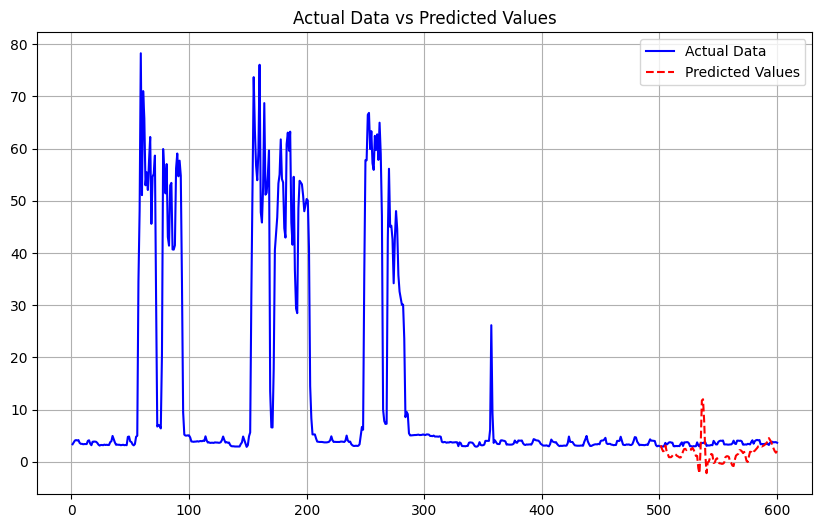

In [69]:
# Plot previous 95 and next 25 predictions
import matplotlib.pyplot as plt

days = np.arange(1, 601)
predicted_days = np.arange(501, 601)

plt.figure(figsize=(10, 6))
plt.plot(days, previous_600_actual, label="Actual Data", color='blue')

# Plot the predicted values for the last 95 days
plt.plot(predicted_days, transformed_output_list, label="Predicted Values", color='red', linestyle='--')

# Adding labels and title
plt.title("Actual Data vs Predicted Values")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()